## Robot Learning

## Assignment 3

#### Group names: Edit this cell and write your names here

### Introduction

Consider the following $10 \times 10$ grid world:

<img src="helpers/gridworld_sketch.png" alt="Grid World" title="Grid World" width="650"/>

The agent may start in any cell that is not an obstacle nor the goal.

It can choose between eight actions, which correspond to moving to the directions 

$$a_i \in \{NW,      N,      NE,     E,     SE,    S,     SW,     W\}$$

These are indexed according to the order above, i.e. $a_0 = NW$ and $a_6 = SW$.

The agent must be careful, for the actions are non-deterministic! The agent moves with probability $0.9$ into the desired
direction, but with probability $0.05$ deviates $45^{\circ}$ to the left and with probability $0.05$ deviates $45^{\circ}$ 
to the right of the desired direction due to treacherous gusts unexpectedly sweeping the grid.

The rewards are structured as follows:

* When it reaches a blue cell, it receives a little snack of 10 points.

* All actions entering a white cell receive -1 point.

* When the agent reaches the green goal cell, it receives 100 points and the episode ends.

* When it attempts to enter a red obstacle cell, it receives -20 points and stays in the cell it came from. This does not additionally yield the reward of the cell it came from.

* When it attempts to leave the grid, it receives -30 points and stays in the cell it came from. This does not additionally yield the reward of the cell it came from.

## Task 11

To familiarize yourself with the environment above, answer the following questions:

<div style="text-align: right; font-weight:bold"> 2 + 1 + 2 = 5 Points </div>

* The agent is at $s = (y_s, x_s) = (3, 6)$ and wants to execute $a_5$. What is the probability $P^{a_5}_{s,s'}$ for $s' =(4,7)$ of moving from state $s$ to follow-up state $s'$ when executing the action $a_5$?

* The agent is at $s = (5, 4)$ and wants to execute $a_7$. What is the probability $P^{a_7}_{s,s'}$ for $s'=s$?

* The agent is at $s = (3, 8)$ and wants to execute $a_3$. What is the expected value of the reward?


1)If the agent is on  $s = (y_s, x_s) = (3, 6)$ and wants to execute $a_5$(S), the probability to move from state $s$ to follow-up state $s'$ is:

$P^{a_5}_{s,s'}$=0.05 \
The agent goes to S with a probability of 0.9. With a probability of 0.05, he changes the direction by $45^{\circ}$ (SE) and reaches $s' =(4,7)$


2)If the agent is on  $s = (y_s, x_s) = (5, 4)$ and wants to execute $a_7$ (W), the probaility for $s'$=$s$ is:
$P^{a_7}_{s,s'}$= $Pr\{s_{t+1}=s'|s_{t}=s, a_{t}=a_{7}\}$ + $Pr\{s_{t+1}=s'|s_{t}=s, a_{t}=a_{7}\}$ = 0.05 + 0.05
=0.10 \
To stay on the same cell, the agent must move towards the upper obstacle (4, 5) or the lower one (6, 5).
Since the agent goes to W with the probability 0.9, the probability is 0.05 according to NW (upper obstacle) and 0.05 according to SW(lower obstacle). Both probabilities have to be summed up.

3)If the agent is on  $s = (y_s, x_s) = (3, 8)$ and wants to execute $a_3$, the expected value of the reward is:

$R^{a_3}_{s,s'}$=$0.9\times100+0.05\times(-1)+0.05\times(-1)$=89.9 \
If the agent moves in direction E he will reach the green goal with probability 0.9 (100 points), with probability 0.05 he will go the direction NE and reaches a white cell (1 points). With probability 0.05 he will go the direction SE and reaches another white cell(1 points).


## Task 12

Using the *Iterative Policy Evaluation* Algorithm, compute the value $V^{\pi}(s)$ of all accessible cells $s$ for a policy $\pi(s,a)$ that chooses with probability $0.5$ a random action and otherwise moves to the right.

Intialize $V(s)$ with zero, use a discount parameter of $\gamma=0.9$ and show your results by printing your state values $V^{\pi}(s)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

#### Note

For your convenience, you are provided the helper function *getNextStatesRewardsAndProbabilities(state, action)* which returns for a given state $s$ and an action $a$ a list of 3 -tuples of the form

$$[(s_0', R^a_{s,s_0'}, P^a_{s,s_0'}), (s_1', R^a_{s,s_1'}, P^a_{s,s_1'}), \dots]$$

where $s_i'$ are all future states with $P^a_{s,s_i'} \neq 0$. Here $s = (y, x)$ and $s_i' = (y_i', x_i')$ are both tuples of integers, $a \in {0, \dots, 7}$ is an integer, and $R^a_{s,s_i'}$, $P^a_{s,s_i'}$ are both floats.

Also, please find below some data structures which you might find helpful and create code and text cells as necessary to present your solution!

In your implementation, $V(s)$ should be a $10 \times 10$ numpy array and $\pi(s,a)$ should be a $10 \times 10 \times 8$ numpy array, where $\sum_a \pi(s,a) = 1$ for all s!

In [24]:
import numpy as np
from utils import getNextStatesRewardsAndProbabilities
import random

# this is a list of all states
states = [(y,x) for y in range(10) for x in range(10)]
# this is a list of all states containing obstacles
obstacles = [(1,6), (1,8), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,8), \
             (3,1), (3,7), (4,3), (4,4), (4,5), (4,6), (5,8), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7),\
             (8,8), (8,9), (9,4), (9,8), (9,9)]
# this is a list containing all goal states
terminalStates = [(3,9)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
# example of how to unpack getNextStatesRewardsAndProbabilities(state, action):
# create dummy state and action
s_test = (0,6)
a_test = 3
# how to call helper function and loop over the return values
for sPrime, R, P in getNextStatesRewardsAndProbabilities(state=s_test, action=a_test):
    print('sPrime:', sPrime, 'R:', R, 'P:', P)

# once you have state values V, you can print them with okay'ish formatting like so:
#print("State Values:")
#print(np.around(V, 1))

sPrime: (0, 6) R: -30.0 P: 0.05
sPrime: (0, 7) R: 10.0 P: 0.9
sPrime: (1, 7) R: -1.0 P: 0.05


In [25]:
#Write a function that takes in a policy and states as input and prints out the state values V

def policyEvaluation(policy,gamma=0.9,states=states,threshold=0.01,actions=actions,nonReachableStates=terminalStates+obstacles,t_max=100):
    V_old = np.zeros(shape=(10,10))

    
    for t in range(t_max):
        delta = 0
        V_new = np.zeros(shape=(10,10)) #this will be V_k+1
        for state in states:
            if state not in nonReachableStates: #if we are in non reachable state then value function is irrevelvant, and simply takes up computation time
            
                for action in actions:
                    
                    #Q is supposed to represent Q(s,a) but we don't need to remember s,a as we will add it as soon as action loop ends
                    Q = 0
                    
                    
                    for sPrime, R, P in getNextStatesRewardsAndProbabilities(state, action):
                        Q += P*(R + gamma*V_old[sPrime]) #represents the sum_s'(Pss'a (Rss'a + gamma*V_k[s']))
                    
                    
                    
                    V_new[state]+=policy[state[0],state[1],action] * Q #represents the sum_a(pi(s,a)*Q(s,a))
                    
            delta = max(delta,abs(V_new[state] - V_old[state]))
            #print(delta)
            
        #print(np.linalg.norm(V_new-V_old))
        
        if delta<threshold:
            #print(f'threshold reached at {t}')
            return V_new
        
        V_old = V_new
        
    return V_new
            
                    
 

In [26]:
policy1 = np.ones((10,10,8))/16 #choosing random action with prob 0.5*1/(no of actions) = 1/16
policy1[:,:,3] = policy1[:,:,3]+0.5 #choosing right with an additional prob of 0.5


In [27]:
V1 = policyEvaluation(policy1)
print("State Values:")
print(np.around(V1, 1))

State Values:
[[ -74.6  -78.1  -91.6  -99.9 -108.6 -116.1 -122.8 -142.4 -167.3 -206.4]
 [ -80.2  -79.7  -87.5  -98.  -109.8 -124.5    0.  -133.2    0.  -179.2]
 [-120.7    0.     0.     0.     0.     0.     0.   -90.2    0.   -92.7]
 [-116.1    0.   -57.5  -63.2  -74.   -85.3  -99.3    0.    26.3    0. ]
 [ -72.4  -64.9  -78.     0.     0.     0.     0.   -56.4  -57.3  -79.9]
 [ -74.   -72.6  -80.2  -87.6  -93.1  -94.3  -95.2 -106.5    0.  -149.7]
 [ -87.6    0.     0.     0.     0.     0.     0.     0.  -153.3 -181. ]
 [ -49.4  -45.5  -50.   -59.9  -72.6  -88.4 -108.2 -132.6 -159.5 -190.1]
 [ -31.   -30.6  -37.3  -47.4  -59.5  -74.3  -92.4 -118.     0.     0. ]
 [ -39.1  -41.   -53.5  -75.8    0.   -80.7  -98.7 -126.1    0.     0. ]]


## Task 13

Now it is time to find a good policy. Use the *Policy Iteration* algorithm to compute the optimal value $V^*(s)$ for each accessible cell. Please make sure to apply *Policy Iteration* exhaustively, which means to let policy evaluation converge every time before applying policy improvement.

Retrieve the resulting optimal-policy $\pi^*(s)$. To obtain a greedy policy given $V(s)$, make use of:

$$\pi_{greedy}(s) := \operatorname{argmax}_a Q(s,a) = \operatorname{argmax}_a \sum_{s'}P_{ss'}^a\cdot[R_{ss'}^a+\gamma\cdot V(s')]$$

As implied by these terms, we recommend using intermediate $Q$-values, shaped $10 \times 10 \times 8$ for this step!

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

## Task 14

Use the *Value Iteration* algorithm to compute the optimal value $V^*(s)$ for each cell. Make sure to reinitialize $V(s)$ with zero. You can sanity-check your results by comparing with $V^*(s)$ from the previous task.

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [28]:
def valueIteration(gamma=0.9, states=states, threshold=0.01 ,actions=actions, nonReachableStates=terminalStates+obstacles, t_max=100):
    V_old = np.zeros(shape=(10,10))

    
    for t in range(t_max):
        delta = 0
        V_new = np.zeros(shape=(10,10)) #this will be V_k+1
        for state in states:
            if state not in nonReachableStates: #if we are in non reachable state then value function is irrevelvant, and simply takes up computation time
                maxQ = -np.inf
                
                for action in actions:                    
                    Q = 0
                    for sPrime, R, P in getNextStatesRewardsAndProbabilities(state, action):
                        Q += P*(R + gamma*V_old[sPrime]) #represents the sum_s'(Pss'a (Rss'a + gamma*V_k[s']))
                    
                    maxQ = max(Q,maxQ)
                
                V_new[state] = maxQ   
                    
                delta = max(delta,abs(V_new[state] - V_old[state]))
                print(delta)
            
        #print(np.linalg.norm(V_new-V_old))
        
        if delta<threshold:
            print(f'threshold reached at {t}')
            return V_new
        
        V_old = V_new
        
    return V_new
    
    





    

In [29]:
V = valueIteration()

7.45
7.45
7.45
7.45
7.45
7.45
7.45
7.45
8.5
8.5
9.45
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
88.45
88.45
88.45
88.45
88.45
88.45
88.45
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
89.9
6.81975
6.81975
6.819750000000001
6.819750000000001
7.49925
7.49925
7.49925
7.49925
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
7.559999999999999
60.50949999999999
60.50949999999999
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
63.54900000000001
68.22950000000002
68.22950000000002
68.22950000000002
68.22950000000002
68.22950000000002
68.22950000000002
68.22950000000002
68.2295000000000

2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
2.630085767849252
1.7293465277095308
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.7300852731019845
1.73

0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.217629497320047
0.2177874422765882
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.21785482793130484
0.15330352329850427
0.15330352329850427
0.15330352329850427
0.15330352329850427
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.15330360988205882
0.153

0.049529804046542836
0.049529804046542836
0.049529804046542836
0.049529804046542836
0.049529804046542836
0.03507077322674945
0.03507077322674945
0.03507077322674945
0.03507077322674945
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369125
0.035070775262369

0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.013587130895601263
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017225575462973097
0.017228115474239303
0.017230444507305265
0.017230444507305265
0.017230444507305265
0.01723044450

In [30]:
print("State Values:")
print(np.around(V, 1))

State Values:
[[75.4 75.4 75.4 75.4 67.7 68.6 81.3 82.  84.1 82. ]
 [77.4 77.9 77.4 76.9 66.7 70.1  0.  84.1  0.  84.1]
 [67.7  0.   0.   0.   0.   0.   0.  84.6  0.  97.3]
 [74.2  0.  84.2 84.7 83.1 81.7 80.4  0.  98.7  0. ]
 [75.3 85.7 84.7  0.   0.   0.   0.  86.3 98.7 97.3]
 [75.6 85.2 84.2 84.2 71.7 63.8 75.2 85.8  0.  86.3]
 [86.9  0.   0.   0.   0.   0.   0.   0.  86.8 85.9]
 [98.8 99.4 99.9 99.9 99.5 99.9 99.9 99.4 97.8 85. ]
 [99.3 99.9 99.9 99.9 99.4 99.9 99.9 99.9  0.   0. ]
 [99.3 99.9 99.9 99.9  0.  99.9 99.9 99.9  0.   0. ]]


In [31]:
# Given a value function V we find the policy by \pi(s) = Argmax_a Sum_s' (P * (R + gamma*V(s')))
def findPolicy(V,gamma=0.9, states=states, actions=actions, nonReachableStates=terminalStates+obstacles):
    policy = np.zeros((10,10,8))
    for s in states:
        
        optimalAction = 0 
        maxQ = -np.inf
        
        for a in actions:
            Q = 0
            for sPrime, R, P in getNextStatesRewardsAndProbabilities(s, a):
                Q += P*(R + gamma*V[sPrime]) #represents the sum_s'(Pss'a (Rss'a + gamma*V_k[s']))
            
            if Q>maxQ:
                maxQ = Q
                optimalAction = a # we are taking argmax here
        
        policy[s[0],s[1],optimalAction] = 1
    
    return policy
            
            

In [32]:
pi = findPolicy(V)
pi

array([[[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1

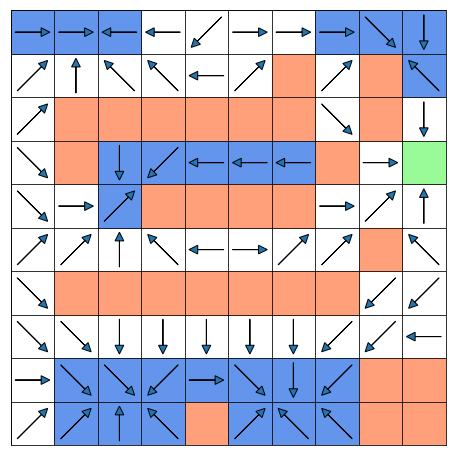

In [33]:
from utils import drawPolicy
drawPolicy(pi)

In [34]:
# print state values with
#print("State Values:")
#print(np.around(V, 1))
# then show policy using helper function as below
# usage of the helper function, where pi is a (10,10,8) numpy array representing a deterministic policy:
# make sure that all entries for pi(s,a) are 0 for all but one action a*, for which pi(s,a*) = 1.0
#drawPolicy(pi)
# this will plot arrows representing your policies into the grid world.